<a href="https://colab.research.google.com/github/MadhuraTonpe165/Assignments/blob/main/Mini_Project_DL_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# IMporting Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
# Getting the shape of the data
print('Train shape: ', train_df.shape)
print('Test shape: ', test_df.shape)

Train shape:  (2000, 21)
Test shape:  (1000, 21)


In [5]:
# Checking for duplicate rows in the dataset
train_df.duplicated().sum()

np.int64(0)

In [6]:
# np.int64(0) means that there are no duplicates in the data

In [7]:
# Checking for duplicate rows in the dataset
test_df.duplicated().sum()

np.int64(0)

In [ ]:
# np.int64(0) means that there are no duplicates in the data

In [8]:
# Getting sn idea about NULL values
train_df.isnull().sum().any()

np.False_

In [ ]:
# np.False_ means that there are no NULL values in the traning data

In [9]:
# Getting sn idea about NULL values
test_df.isnull().sum().any()

np.False_

In [ ]:
# np.False_ means that there are no NULL values in the testing data

In [ ]:
# EDA ->

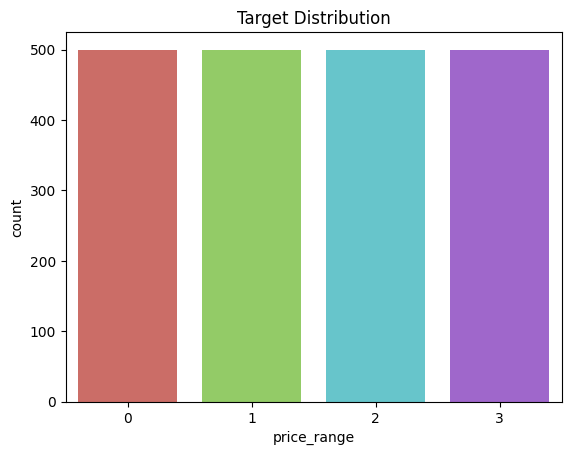

In [11]:
# Target Distribution ->

sns.countplot(data = train_df, x = 'price_range', palette= 'hls')
plt.title('Target Distribution')
plt.show()

In [ ]:
# The data looks perfectly balanced

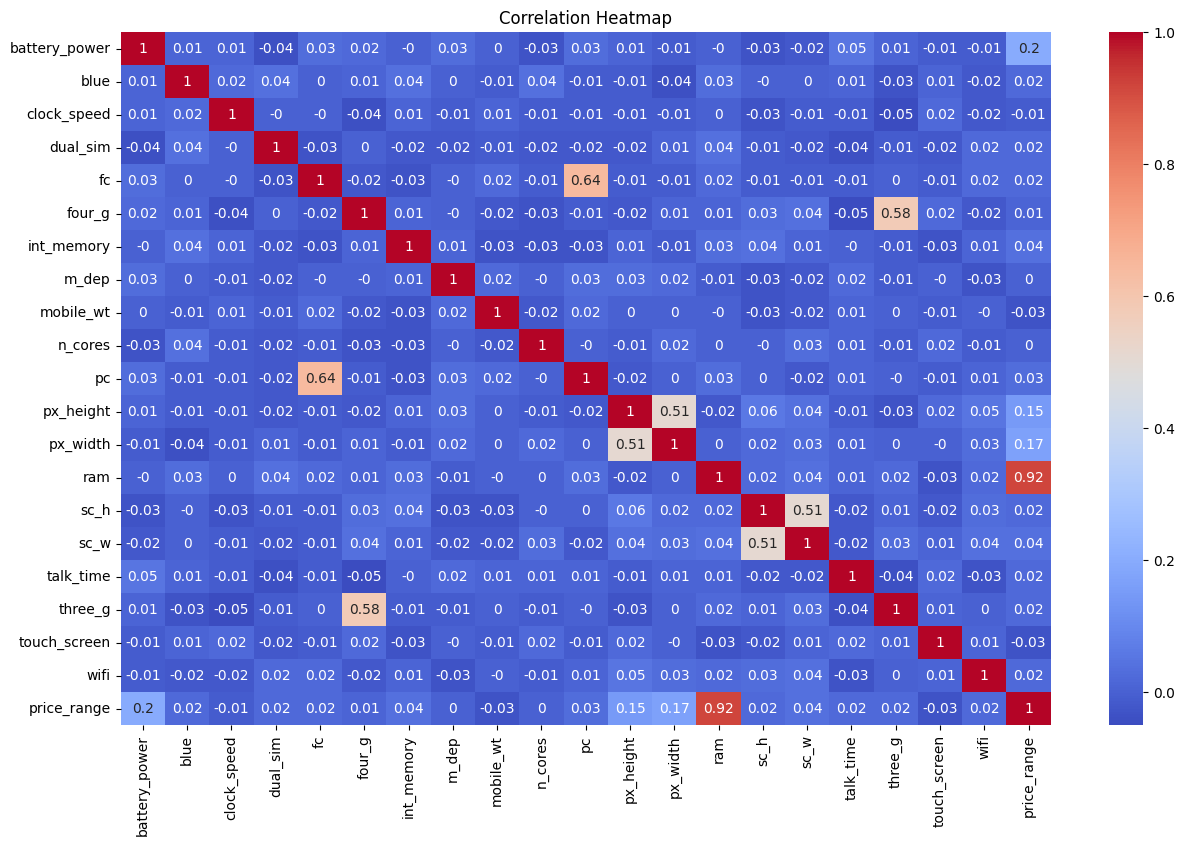

In [15]:
# Correlational Heatmap

plt.figure(figsize = (15,9))
corr = train_df.corr().round(2)
sns.heatmap(corr, annot= True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

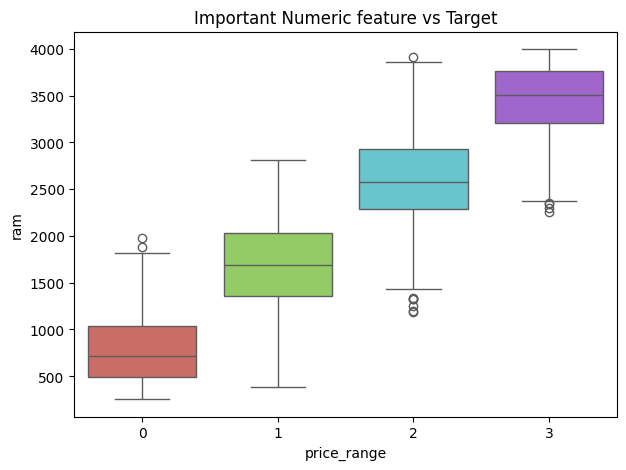

In [16]:
# Important numeric features vs target

plt.figure(figsize= (7,5))
sns.boxplot(x = 'price_range', y = 'ram', data = train_df, palette= 'hls')
plt.title('RAM vs Target')
plt.show()

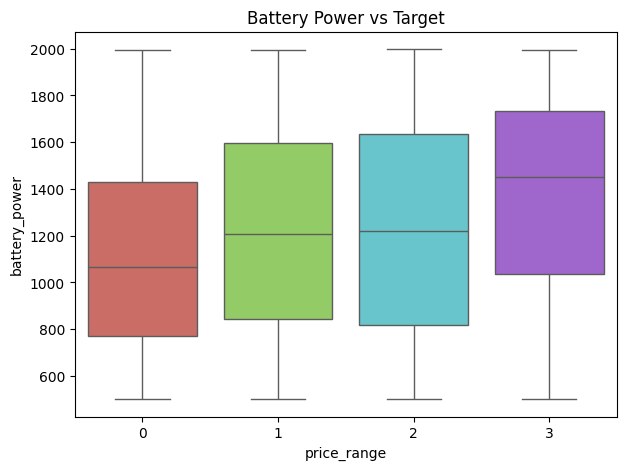

In [19]:
#
plt.figure(figsize= (7,5))
sns.boxplot(x = 'price_range', y = 'battery_power', data = train_df, palette= 'hls')
plt.title('Battery Power vs Target')
plt.show()

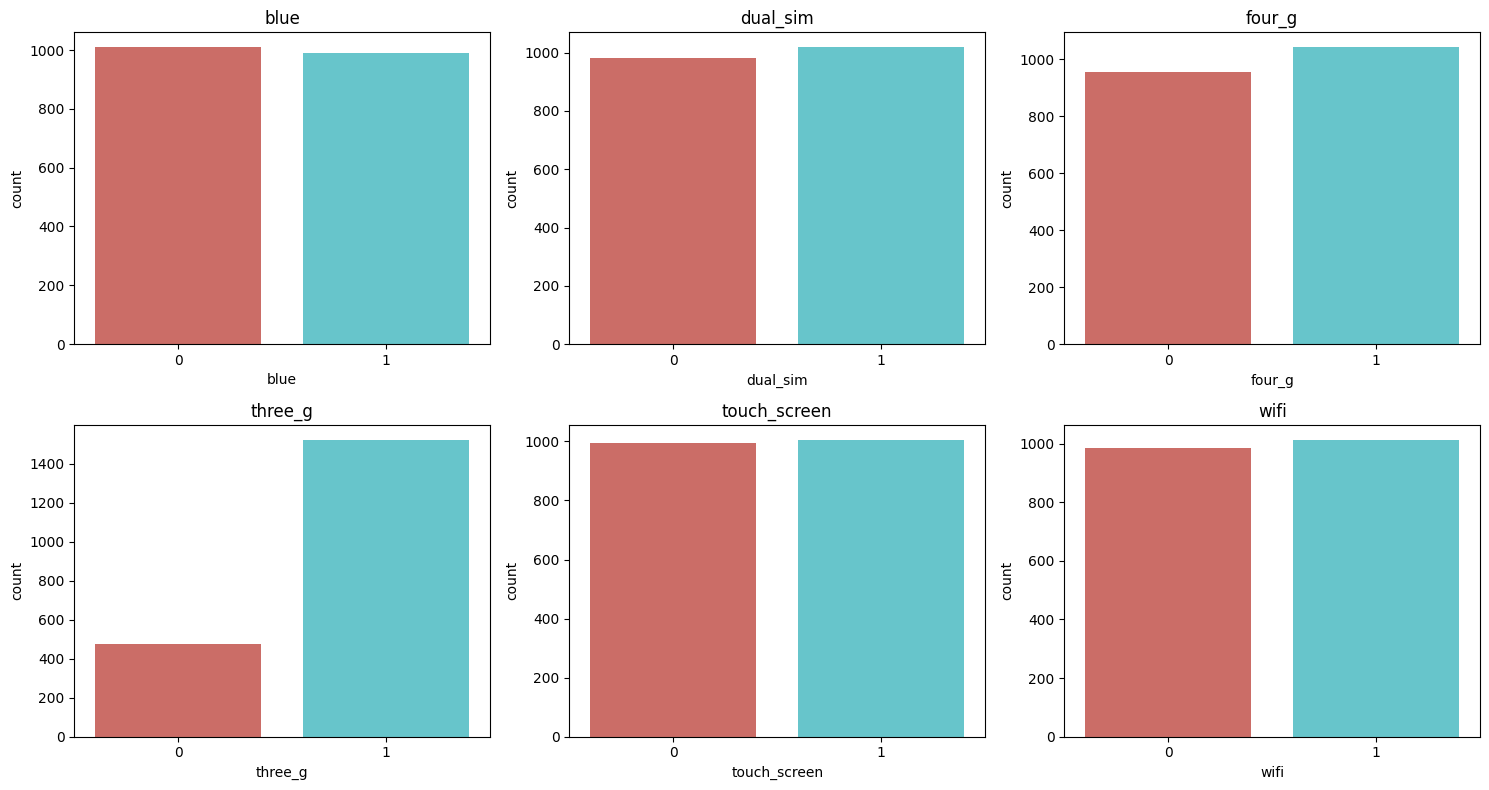

In [23]:
# Binary Features
binary_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
fig, axes = plt.subplots(2, 3, figsize = (15,8))
axes = axes.flatten()
for i, f in enumerate(binary_features):
  sns.countplot(x = f, data = train_df, palette= 'hls', ax = axes[i])
  axes[i].set_title(f)
plt.tight_layout()
plt.show()

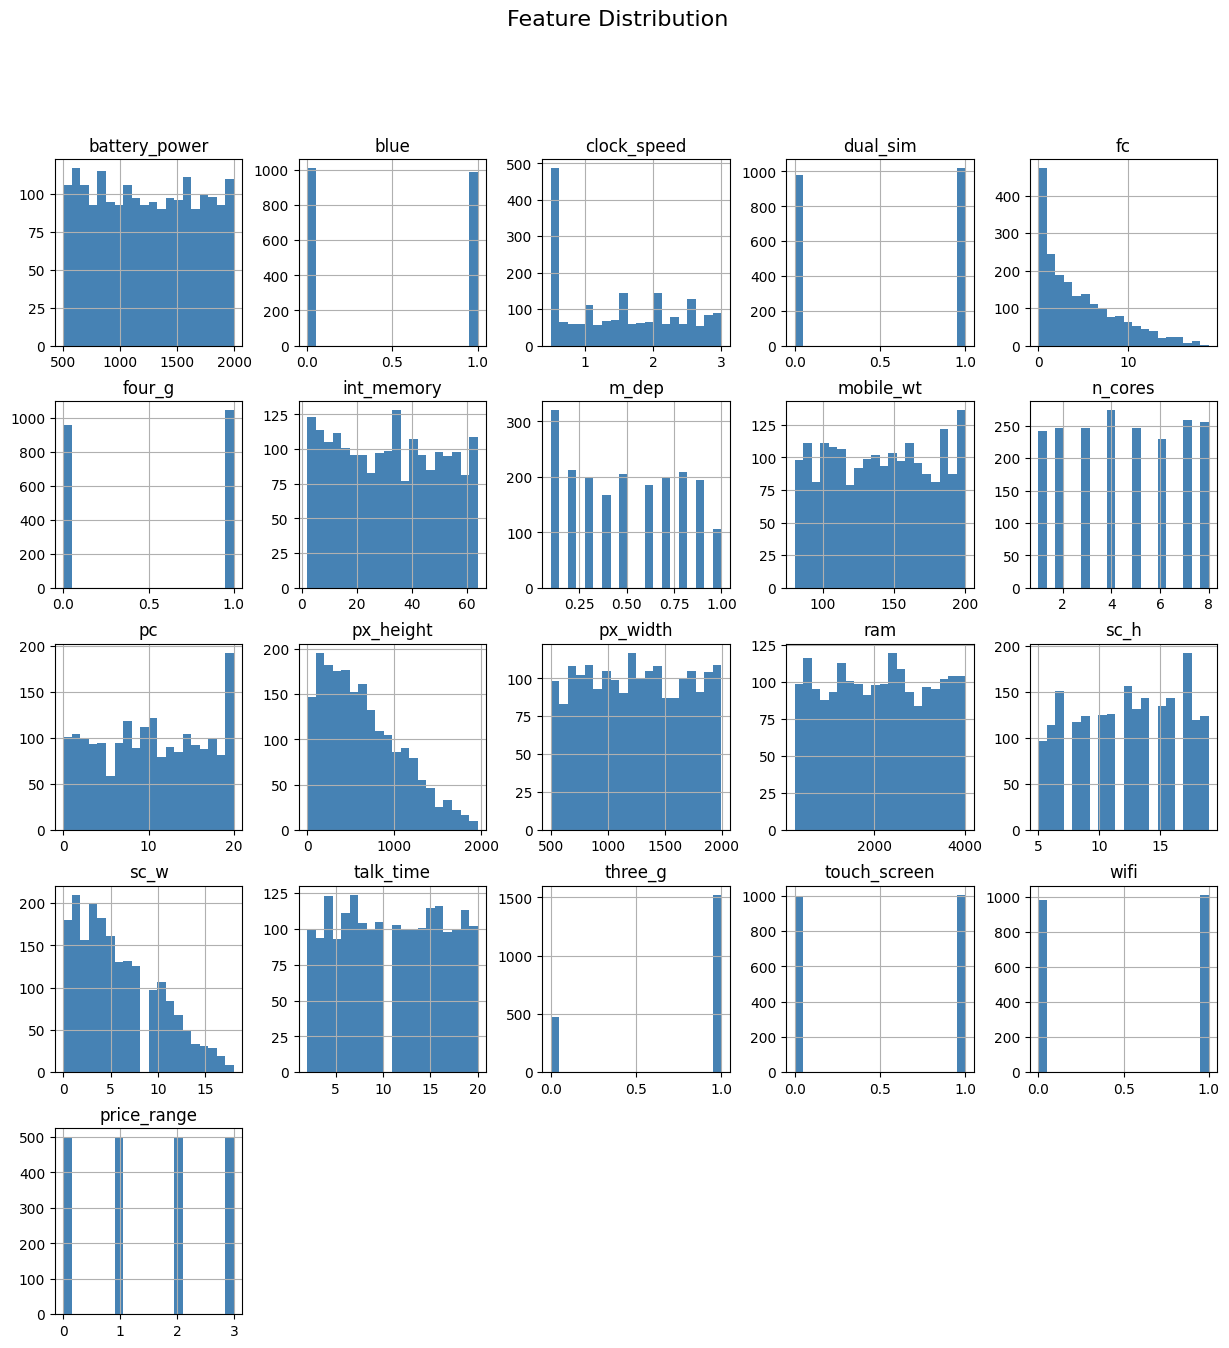

In [24]:
# Feature distribution
train_df.hist(bins= 20, figsize=(15,15), color = 'steelblue')
plt.suptitle('Feature Distribution', size = 16)
plt.show()

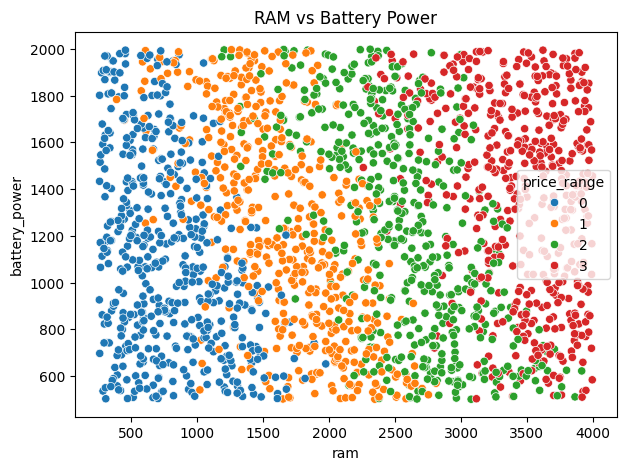

In [26]:
# Scastter Plot
plt.figure(figsize = (7,5))
sns.scatterplot(x = 'ram', y = 'battery_power', hue= 'price_range', data = train_df, palette= 'tab10')
plt.title('RAM vs Battery Power')
plt.show()

In [28]:
# Preprocessing the data
X = train_df.drop('price_range', axis = 1)
y = train_df['price_range']

In [29]:
# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_final = scaler.transform((test_df.drop('id', axis = 1)))

In [30]:
# Performing train test split
X_train, X_val, y_train,y_val = train_test_split(X_scaled, y , test_size=0.2, stratify= y, random_state= 5)

In [31]:
#help
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        com

In [32]:
# Basline ML models
print("---- Logistic Regression ----")
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_val)
print('Accuracy score :', np.round(metrics.accuracy_score(y_val, y_pred), 3))

---- Logistic Regression ----
Accuracy score : 0.965


In [33]:
#Randon Forest odel

print(" ----- Rondom Forest Model ----")
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_val)
print('Accuracy score :', np.round(metrics.accuracy_score(y_val, y_pred), 3))

 ----- Rondom Forest Model ----
Accuracy score : 0.888


In [34]:
# Basline ANN Classifier
model_base = Sequential([
    Dense(32, activation = 'relu', input_dim =X_train.shape[1]),
    Dense(4, activation= 'softmax')
])

In [35]:
# Compiling the model
model_base.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [36]:
# Fitting the model
history_base = model_base.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    epochs = 30,
    batch_size = 32,
    verbose = 1
)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2941 - loss: 1.4657 - val_accuracy: 0.3900 - val_loss: 1.3302
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4083 - loss: 1.2772 - val_accuracy: 0.4500 - val_loss: 1.2203
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4857 - loss: 1.1698 - val_accuracy: 0.5075 - val_loss: 1.1213
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5989 - loss: 1.0267 - val_accuracy: 0.5725 - val_loss: 1.0306
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6216 - loss: 0.9552 - val_accuracy: 0.6200 - val_loss: 0.9449
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6481 - loss: 0.8610 - val_accuracy: 0.6425 - val_loss: 0.8691
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7258 - loss: 0.7728 - val_accuracy: 0.6700 - val_loss: 0.8029
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7519 - loss: 0.7300 - val_accuracy: 0.7075 - val_loss

In [37]:
# Model Evaluation
loss_base, acc_base = model_base.evaluate(X_val, y_val)
print("Loss: ", loss_base)
print("Accuracy : ", np.round(acc_base, 3))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9097 - loss: 0.2642 
Loss:  0.27772194147109985
Accuracy :  0.9


In [38]:
# Optimized ANN Model with Dropout

model_opt = Sequential([
    Dense(128, activation ='relu', input_dim = X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation= 'relu'),
    Dropout(0.2),
    Dense(32, activation= 'relu'),
    Dropout(0.1),
    Dense(4, activation= 'softmax')
])

In [39]:
# Model Compling
model_opt.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [40]:
# Early Stopping
early_stop = EarlyStopping(monitor= 'val_loss', patience = 5, restore_best_weights= True)

In [41]:
# Model Training
history_opt = model_opt.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    epochs = 100,
    batch_size = 32,
    callbacks = [early_stop],
    verbose = 1
)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3011 - loss: 1.3696 - val_accuracy: 0.5450 - val_loss: 1.1250
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5465 - loss: 1.0680 - val_accuracy: 0.7675 - val_loss: 0.7017
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6797 - loss: 0.7216 - val_accuracy: 0.8200 - val_loss: 0.4776
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7525 - loss: 0.5577 - val_accuracy: 0.8600 - val_loss: 0.3705
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7977 - loss: 0.4720 - val_accuracy: 0.8675 - val_loss: 0.3298
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8451 - loss: 0.4026 - val_accuracy: 0.8850 - val_loss: 0.2781
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8465 - loss: 0.3683 - val_accuracy: 0.8875 - val_loss: 0.2660
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8637 - loss: 0.3396 - val_accuracy: 0.8875 -

In [42]:
# Model Evaluation
loss_opt, acc_opt = model_base.evaluate(X_val, y_val)
print("Loss: ", loss_opt)
print("Accuracy : ", np.round(acc_opt, 3))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9097 - loss: 0.2642 
Loss:  0.27772194147109985
Accuracy :  0.9


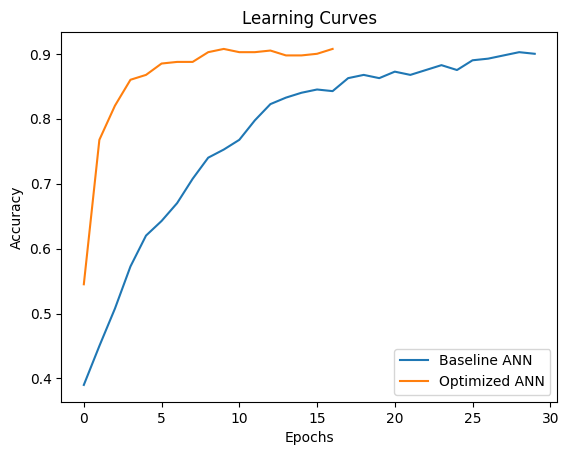

In [43]:
# Learning Curves
plt.plot(history_base.history['val_accuracy'], label = 'Baseline ANN')
plt.plot(history_opt.history['val_accuracy'], label = 'Optimized ANN')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [44]:
# Evaluation on testing data
y_val_pred = model_opt.predict(X_val)
y_val_pred_labels = np.argmax(y_val_pred, axis = 1)
print('Accuracy Score :', np.round(metrics.accuracy_score(y_val, y_val_pred_labels), 3))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy Score : 0.902


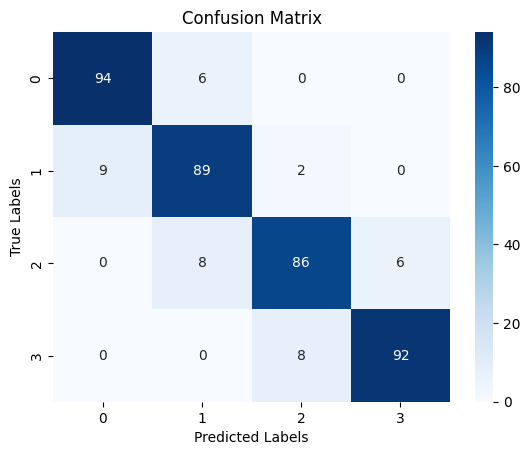

In [45]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_val, y_val_pred_labels)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd',
            xticklabels = [0, 1, 2, 3],
            yticklabels = [0, 1, 2, 3])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [46]:
# Prediction on test data
test_predictions = model_opt.predict(X_test_final)
test_labels = np.argmax(test_predictions, axis = 1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [47]:
# Creating the submission file
submission = test_df.copy()
submission['price_range'] = test_labels
submission.to_csv('submission.csv', index = False)